In [ ]:
!pip install -q pandas seaborn matplotlib

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
birds = pd.read_csv('../../data/birds.csv')
birds.head()
#print(len(birds.Order.unique().tolist()), birds.Order.unique().tolist())

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


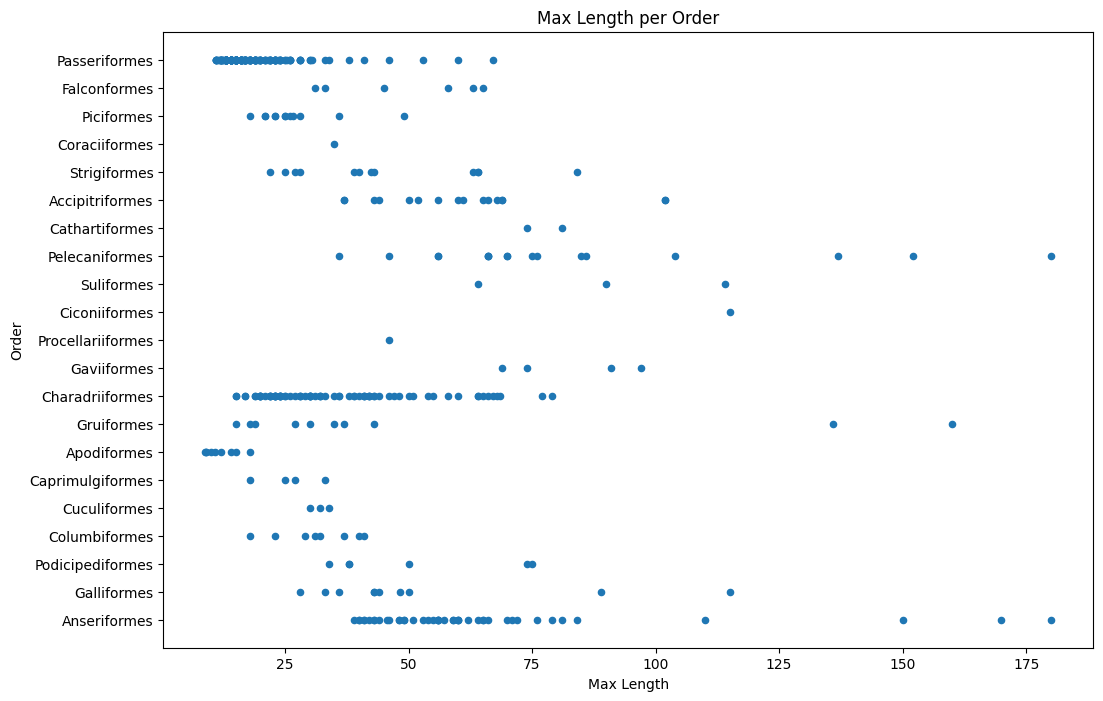

In [11]:
birds.plot(kind='scatter',x='MaxLength',y='Order',figsize=(12,8))

plt.title('Max Length per Order')
plt.ylabel('Order')
plt.xlabel('Max Length')

plt.show()

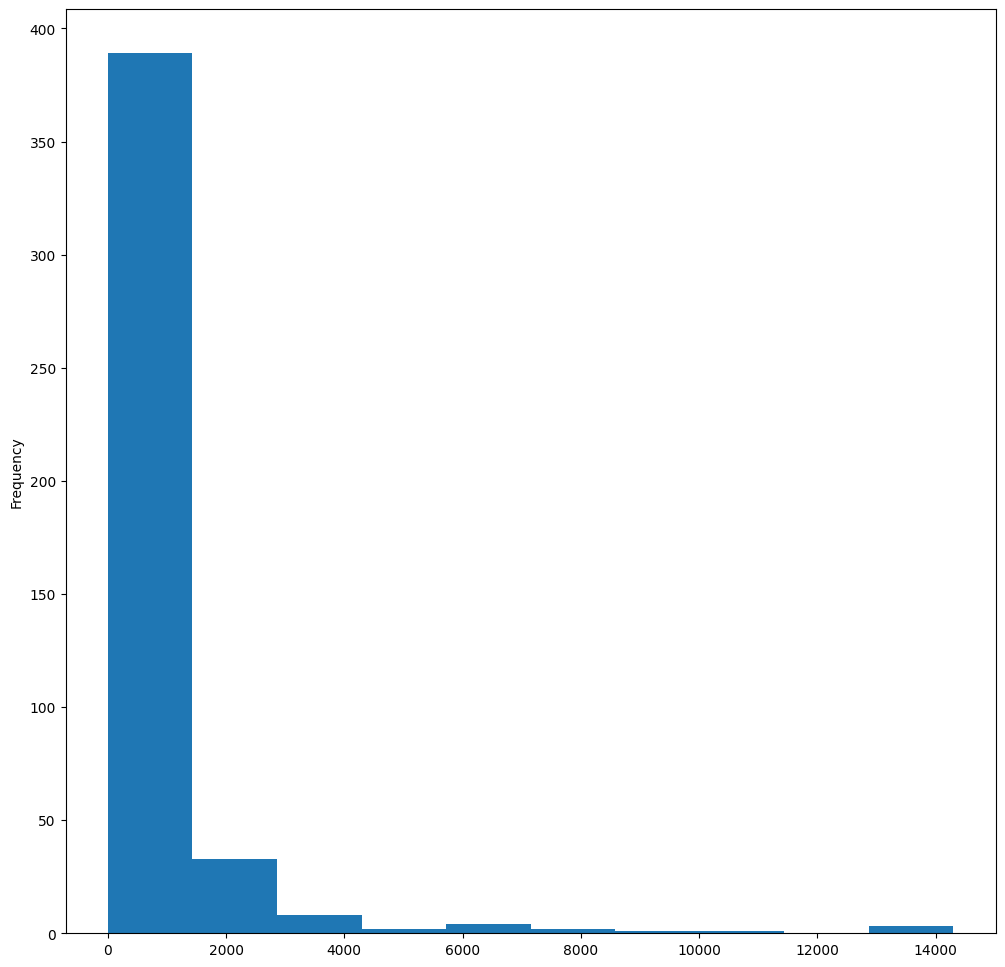

In [19]:
birds['MaxBodyMass'].plot(kind = 'hist', figsize = (12,12))
plt.show()

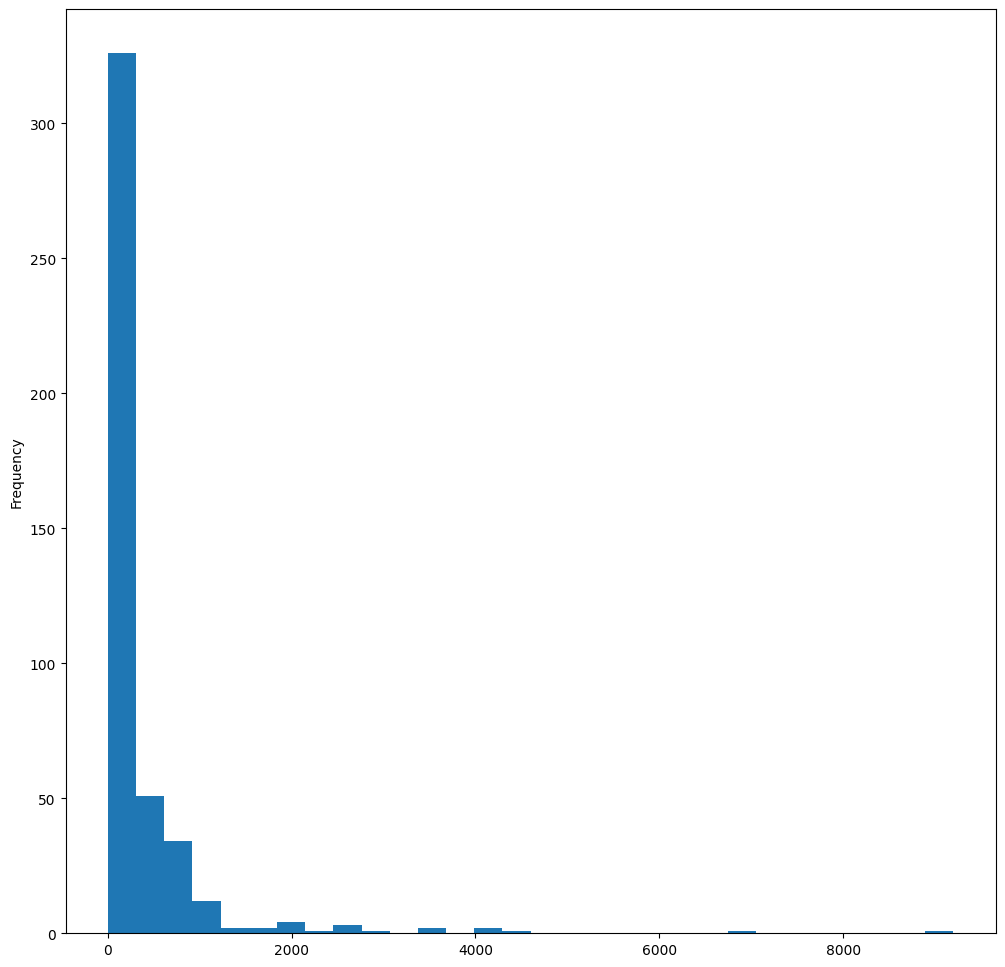

In [21]:
birds['MinBodyMass'].plot(kind = 'hist', bins = 30, figsize = (12,12))
plt.show()

443 319


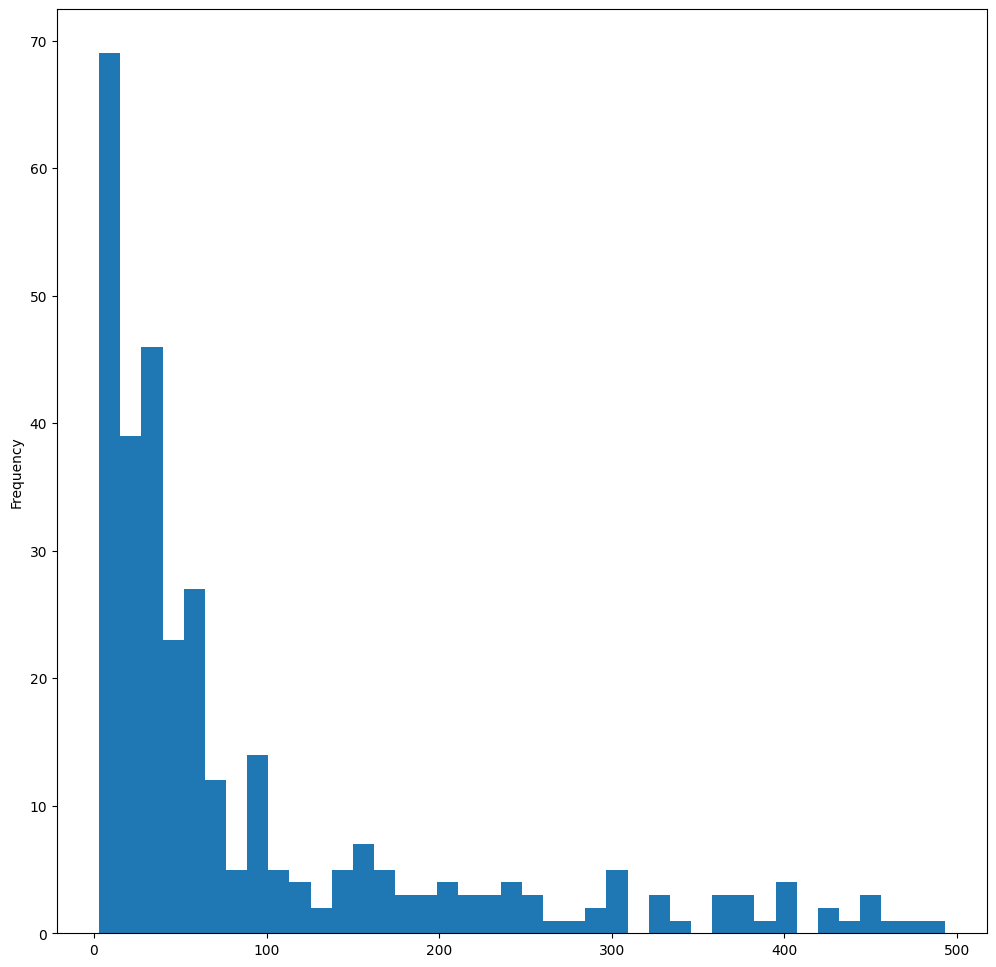

In [24]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 500)]
print(len(birds), len(filteredBirds))
filteredBirds['MaxBodyMass'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show()     

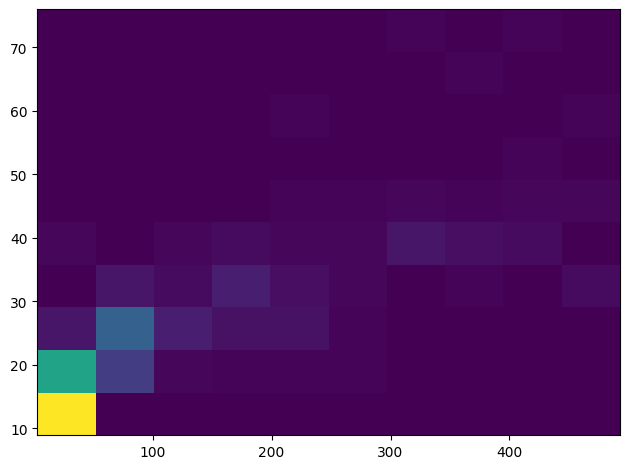

In [25]:
x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

In [31]:
cs = filteredBirds.ConservationStatus.unique().tolist()
flb = []
for c in cs:
  flb.append(filteredBirds.loc[filteredBirds.ConservationStatus=='{c}', 'MinWingspan'])

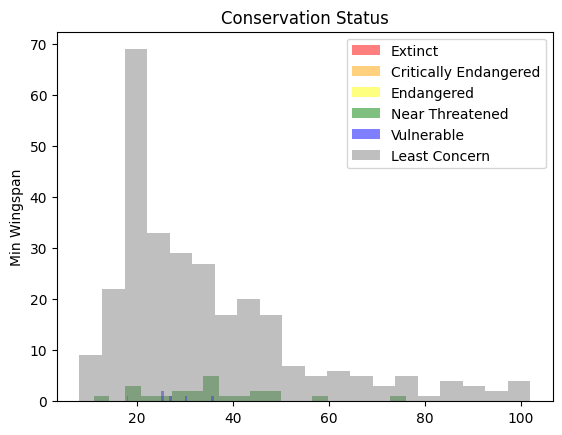

In [32]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Min Wingspan')
plt.legend();

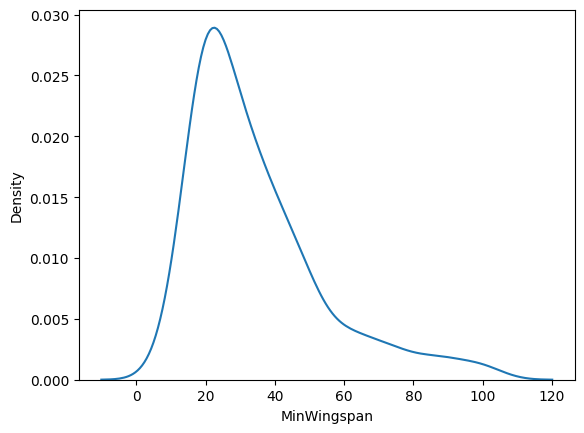

In [33]:
sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

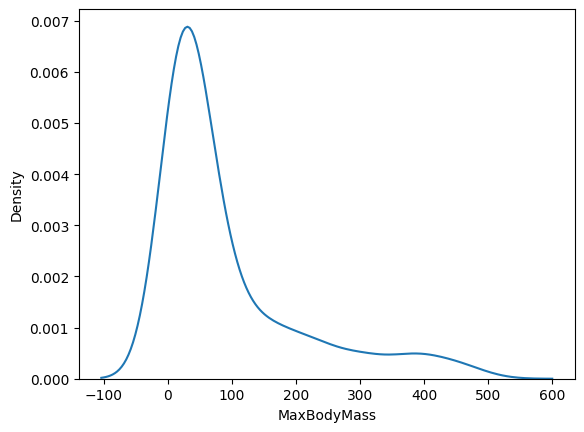

In [34]:
sns.kdeplot(filteredBirds['MaxBodyMass'])
plt.show()

In [ ]:
sns.kdeplot(filteredBirds['MaxBodyMass'], bw_adjust=.1)
plt.show()

In [ ]:
sns.kdeplot(
   data=filteredBirds, x="MaxBodyMass", hue="Order",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

/var/folders/v3/3dkg22g1169bpykn3jssbyph0000gn/T/ipykernel_53795/49960699.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")
/var/folders/v3/3dkg22g1169bpykn3jssbyph0000gn/T/ipykernel_53795/49960699.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")
/var/folders/v3/3dkg22g1169bpykn3jssbyph0000gn/T/ipykernel_53795/49960699.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")


<Axes: xlabel='MinLength', ylabel='MaxLength'>

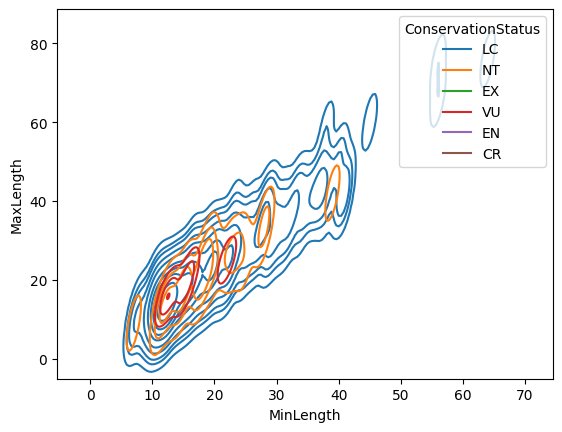

In [35]:
sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")